In [ ]:
print("Team - 5")
print("Project Name - Heart Disease Prediction System.")
print("Module - Preprocessing, Data Cleaning and Exploratory Data Analysis.")
print("Dataset used - \'Heart_Disease_Prediction.csv'")

Team - 5
Project Name - Heart Disease Prediction System.
Module - Preprocessing, Data Cleaning and Exploratory Data Analysis.
Dataset used - 'Heart_Disease_Prediction.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction.csv


In [ ]:
data=pd.read_csv(r"Heart_Disease_Prediction.csv")

In [ ]:
print(data.head())

   Age  Sex  Chest pain type  ...  Number of vessels fluro  Thallium  Heart Disease
0   70    1                4  ...                        3         3       Presence
1   67    0                3  ...                        0         7        Absence
2   57    1                2  ...                        0         7       Presence
3   64    1                4  ...                        1         7        Absence
4   74    0                2  ...                        1         3        Absence

[5 rows x 14 columns]


In [ ]:
x=data.iloc[:,0:15].values
print(x)

[[70 1 4 ... 3 3 'Presence']
 [67 0 3 ... 0 7 'Absence']
 [57 1 2 ... 0 7 'Presence']
 ...
 [56 0 2 ... 0 3 'Absence']
 [57 1 4 ... 0 6 'Absence']
 [67 1 4 ... 3 3 'Presence']]


In [ ]:
y=data.iloc[:,1].values
print(y)

[1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0
 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1
 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 0 1 1]


In [ ]:
print(data.describe())

              Age         Sex  ...  Number of vessels fluro    Thallium
count  270.000000  270.000000  ...               270.000000  270.000000
mean    54.433333    0.677778  ...                 0.670370    4.696296
std      9.109067    0.468195  ...                 0.943896    1.940659
min     29.000000    0.000000  ...                 0.000000    3.000000
25%     48.000000    0.000000  ...                 0.000000    3.000000
50%     55.000000    1.000000  ...                 0.000000    3.000000
75%     61.000000    1.000000  ...                 1.000000    7.000000
max     77.000000    1.000000  ...                 3.000000    7.000000

[8 rows x 13 columns]


In [ ]:
print(data.shape)

(270, 14)


In [ ]:
# Checking for the missing values.
data.isnull().values.any()

False

In [ ]:
missing_value_count_by_column=(data.isnull().sum())
print(missing_value_count_by_column[missing_value_count_by_column>0])

Series([], dtype: int64)


In [ ]:
#Dropping columns with missing values
#data_without_missing_values=data.dropna(axis=1)
cols_with_missing=[col for col in data.columns if data[col].isnull().any()]
reduced_original_data=data.drop(cols_with_missing,axis=1)
reduced_test_data=data.drop(cols_with_missing,axis=1)

In [ ]:
#Catgorical data  
#for Country Variable  
from sklearn.preprocessing import LabelEncoder  
label_encoder_x= LabelEncoder()  
x[:, 0]= label_encoder_x.fit_transform(x[:, 0]) 
print(x)

[[36 1 4 ... 3 3 'Presence']
 [33 0 3 ... 0 7 'Absence']
 [23 1 2 ... 0 7 'Presence']
 ...
 [22 0 2 ... 0 3 'Absence']
 [23 1 4 ... 0 6 'Absence']
 [33 1 4 ... 3 3 'Presence']]


In [ ]:
labelencoder_y= LabelEncoder()  
y= labelencoder_y.fit_transform(y)  
print(y)

[1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0
 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1
 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 0 1 1]


In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

In [ ]:
print(x_train)

[[31 1 4 ... 0 7 'Absence']
 [9 1 4 ... 0 3 'Absence']
 [24 0 4 ... 0 3 'Absence']
 ...
 [22 0 4 ... 2 7 'Presence']
 [10 1 4 ... 1 3 'Presence']
 [33 1 4 ... 2 3 'Presence']]


In [ ]:
print(x_test)

[[29 1 1 145 233 1 2 150 0 2.3 3 0 6 'Absence']
 [12 0 3 142 177 0 2 160 1 1.4 3 0 3 'Absence']
 [30 0 4 130 303 0 0 122 0 2.0 2 2 3 'Absence']
 [36 1 3 160 269 0 0 112 1 2.9 2 1 7 'Presence']
 [17 1 3 110 175 0 0 123 0 0.6 1 0 3 'Absence']
 [35 0 1 140 239 0 0 151 0 1.8 1 2 3 'Absence']
 [20 1 2 192 283 0 2 195 0 0.0 1 1 7 'Presence']
 [8 1 3 120 240 1 0 194 0 0.8 3 0 7 'Absence']
 [27 1 3 150 243 1 0 137 1 1.0 2 0 3 'Absence']
 [37 0 4 112 149 0 0 125 0 1.6 2 0 3 'Absence']
 [17 0 3 140 308 0 2 142 0 1.5 1 1 3 'Absence']
 [23 1 4 132 207 0 0 168 1 0.0 1 0 7 'Absence']
 [20 1 3 125 273 0 2 152 0 0.5 3 1 3 'Absence']
 [23 1 4 165 289 1 2 124 0 1.0 2 3 7 'Presence']
 [26 1 4 140 293 0 2 170 0 1.2 2 2 7 'Presence']
 [16 0 4 110 254 0 2 159 0 0.0 1 0 3 'Absence']
 [24 1 3 140 211 1 2 165 0 0.0 1 0 3 'Absence']
 [40 1 4 125 304 0 2 162 1 0.0 1 3 3 'Presence']
 [28 1 2 120 281 0 2 103 0 1.4 2 1 7 'Presence']
 [14 1 2 110 229 0 0 168 0 1.0 3 0 7 'Presence']
 [17 1 4 140 298 0 0 122 1 4.2 2 3

In [ ]:
print(y_train)

[1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1
 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1
 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1]


In [ ]:
print(y_test)

[1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1
 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1]


In [ ]:
#To fill in missing values by their sum values
data.fillna(data.sum(),inplace=True)

In [ ]:
print(data)

     Age  Sex  Chest pain type  ...  Number of vessels fluro  Thallium  Heart Disease
0     70    1                4  ...                        3         3       Presence
1     67    0                3  ...                        0         7        Absence
2     57    1                2  ...                        0         7       Presence
3     64    1                4  ...                        1         7        Absence
4     74    0                2  ...                        1         3        Absence
..   ...  ...              ...  ...                      ...       ...            ...
265   52    1                3  ...                        0         7        Absence
266   44    1                2  ...                        0         7        Absence
267   56    0                2  ...                        0         3        Absence
268   57    1                4  ...                        0         6        Absence
269   67    1                4  ...                   

In [ ]:
# Checking for the imbalanced data based on BP.
data['BP'].value_counts()

120    34
130    31
140    30
150    17
110    17
160    11
125    10
112     9
138     9
128     9
118     7
132     6
135     6
108     6
145     5
124     5
134     4
152     4
100     4
122     3
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
178     2
170     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
158     1
192     1
156     1
117     1
155     1
148     1
146     1
123     1
144     1
200     1
Name: BP, dtype: int64

In [ ]:
# Checking for the imbalanced data based on Chest pain type.
data['Chest pain type'].value_counts()

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [ ]:
# Checking for any correlations.
data.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


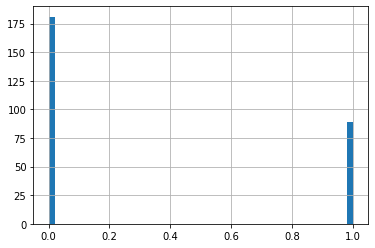

In [ ]:
# histogram of Exercise angina.
data['Exercise angina'].hist(bins=50)

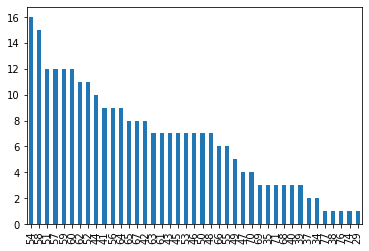

In [ ]:
# bar chart -  distribution of a categorical variable
data['Age'].value_counts().plot.bar()

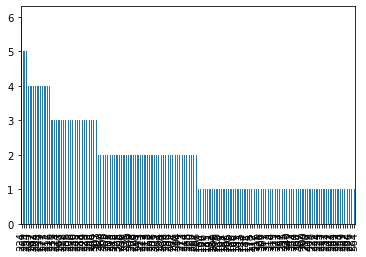

In [ ]:
# bar chart -  distribution of a categorical variable
data['Cholesterol'].value_counts().plot.bar()

In [ ]:
# Checking for the imbalanced data based on Number of vessels fluro.
data['Number of vessels fluro'].value_counts()

0    160
1     58
2     33
3     19
Name: Number of vessels fluro, dtype: int64

In [ ]:
# Checking for the missing values.
data.isnull().values.any()

False

In [ ]:
print("The Dataset \'heart_failure_clinical_records_dataset.csv' is now cleaned")

The Dataset 'heart_failure_clinical_records_dataset.csv' is now cleaned


In [ ]:
print("Now the next part is feature selection")

Now the next part is feature selection


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=0
)
x_train.shape,x_test.shape


((189, 14), (81, 14))

In [ ]:
x_train.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.083703,0.133966,0.297718,0.258970,0.172462,0.219263,-0.415413,0.076812,0.231137,0.186337,0.358394,0.106091
Sex,-0.083703,1.000000,0.046089,-0.049142,-0.183637,0.006508,0.026342,-0.111901,0.217009,0.114923,0.017197,0.119849,0.410355
Chest pain type,0.133966,0.046089,1.000000,-0.010442,0.037565,-0.142296,0.076418,-0.361697,0.393991,0.186410,0.169572,0.234612,0.299351
BP,0.297718,-0.049142,-0.010442,1.000000,0.154314,0.129512,0.136580,-0.100854,0.065678,0.231450,0.195865,0.094371,0.126557
Cholesterol,0.258970,-0.183637,0.037565,0.154314,1.000000,0.036653,0.141244,0.001857,0.052614,-0.022257,-0.060325,0.077213,0.006459
FBS over 120,0.172462,0.006508,-0.142296,0.129512,0.036653,1.000000,0.071151,0.022953,-0.051903,-0.058643,-0.045316,0.134153,-0.015998
EKG results,0.219263,0.026342,0.076418,0.136580,0.141244,0.071151,1.000000,-0.104162,0.097275,0.107461,0.134066,0.185964,-0.065038
Max HR,-0.415413,-0.111901,-0.361697,-0.100854,0.001857,0.022953,-0.104162,1.000000,-0.455800,-0.319762,-0.419402,-0.307909,-0.295528
Exercise angina,0.076812,0.217009,0.393991,0.065678,0.052614,-0.051903,0.097275,-0.455800,1.000000,0.234117,0.227495,0.177518,0.345496
ST depression,0.231137,0.114923,0.186410,0.231450,-0.022257,-0.058643,0.107461,-0.319762,0.234117,1.000000,0.623612,0.308668,0.330615


Pearson correlation


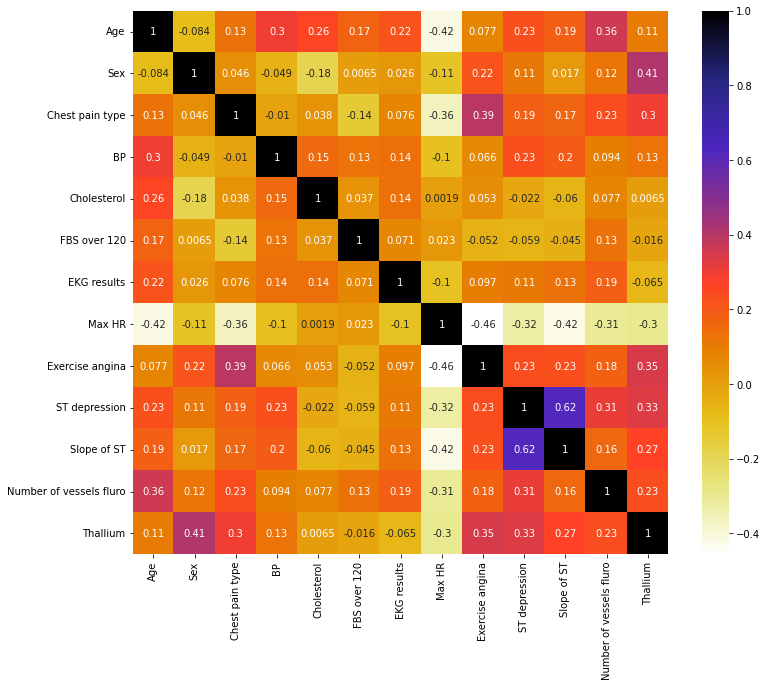

In [ ]:
import seaborn as sns
#using pearson Correlation
print("Pearson correlation")
plt.figure(figsize=(12,10))
cor=x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset,threshold):
  col_corr=set() #set of all names of correlated columns
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
      for j in range(i):
        if abs(corr_matrix.iloc[i,j])>threshold:
          colname=corr_matrix.columns[i]
          col_corr.add(colname)
  return col_corr

In [ ]:
corr_features=correlation(x_train,0.6)
len(set(corr_features))

1

In [ ]:
corr_features

{'Slope of ST'}

In [ ]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,Thallium,Heart Disease
64,63,1,1,145,233,1,2,150,0,2.3,0,6,Absence
135,46,0,3,142,177,0,2,160,1,1.4,0,3,Absence
153,64,0,4,130,303,0,0,122,0,2.0,2,3,Absence
189,70,1,3,160,269,0,0,112,1,2.9,1,7,Presence
253,51,1,3,110,175,0,0,123,0,0.6,0,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,59,1,4,140,177,0,0,162,1,0.0,1,7,Presence
222,57,1,3,150,168,0,0,174,0,1.6,0,3,Absence
259,43,1,4,150,247,0,0,171,0,1.5,0,3,Absence
126,62,1,4,120,267,0,0,99,1,1.8,2,7,Presence


In [ ]:
train = data.copy()
target = train.pop('Heart Disease')
train.head(2)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7


In [ ]:
num_features_opt = 25   # the number of features that we need to choose as a result
num_features_max = 35   # the somewhat excessive number of features, which we will choose at each stage
features_best = []

In [ ]:
#selectFromModel with linearSVC
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2
from sklearn.model_selection import train_test_split
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(train, target)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(train)
X_selected_df = pd.DataFrame(X_new, columns=[train.columns[i] for i in range(len(train.columns)) if model.get_support()[i]])
features_best.append(X_selected_df.columns.tolist())

In [ ]:
print(features_best)

[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Number of vessels fluro', 'Thallium']]


In [ ]:
#by the SelectKBest with Chi-2
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:
#Loading data
X,y=datasets.load_wine(return_X_y=True)
# k = 4 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
fit.scores_

array([5.44549882e+00, 2.80686046e+01, 7.43380598e-01, 2.93836955e+01,
       4.50263809e+01, 1.56230759e+01, 6.33343081e+01, 1.81548480e+00,
       9.36828307e+00, 1.09016647e+02, 5.18253981e+00, 2.33898834e+01,
       1.65400671e+04])

In [ ]:
X_new=test.fit_transform(X, y)

In [ ]:
print(X_new)

[[1.270000e+02 3.060000e+00 5.640000e+00 1.065000e+03]
 [1.000000e+02 2.760000e+00 4.380000e+00 1.050000e+03]
 [1.010000e+02 3.240000e+00 5.680000e+00 1.185000e+03]
 [1.130000e+02 3.490000e+00 7.800000e+00 1.480000e+03]
 [1.180000e+02 2.690000e+00 4.320000e+00 7.350000e+02]
 [1.120000e+02 3.390000e+00 6.750000e+00 1.450000e+03]
 [9.600000e+01 2.520000e+00 5.250000e+00 1.290000e+03]
 [1.210000e+02 2.510000e+00 5.050000e+00 1.295000e+03]
 [9.700000e+01 2.980000e+00 5.200000e+00 1.045000e+03]
 [9.800000e+01 3.150000e+00 7.220000e+00 1.045000e+03]
 [1.050000e+02 3.320000e+00 5.750000e+00 1.510000e+03]
 [9.500000e+01 2.430000e+00 5.000000e+00 1.280000e+03]
 [8.900000e+01 2.760000e+00 5.600000e+00 1.320000e+03]
 [9.100000e+01 3.690000e+00 5.400000e+00 1.150000e+03]
 [1.020000e+02 3.640000e+00 7.500000e+00 1.547000e+03]
 [1.120000e+02 2.910000e+00 7.300000e+00 1.310000e+03]
 [1.200000e+02 3.140000e+00 6.200000e+00 1.280000e+03]
 [1.150000e+02 3.400000e+00 6.600000e+00 1.130000e+03]
 [1.080000

In [ ]:
#by the recursive feature Elimination (RFE)with logistic Regression
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier

In [ ]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_features_max, step=10, verbose=5)
rfe_selector.fit(train, target)
rfe_support = rfe_selector.get_support()
rfe_feature = train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

13 selected features


In [ ]:
features_best.append(rfe_feature)

In [ ]:
#by the recursive feature elimination with random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=200), threshold='1.25*median')
embeded_rf_selector.fit(train, target)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200, n_jobs=None,
                                                 oob_score=False,

In [ ]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

5 selected features


In [ ]:
features_best.append(embeded_rf_feature)

In [ ]:
#selection of best features
features_best

[['Age',
  'Sex',
  'Chest pain type',
  'BP',
  'Cholesterol',
  'EKG results',
  'Max HR',
  'Exercise angina',
  'ST depression',
  'Number of vessels fluro',
  'Thallium'],
 ['Age',
  'Sex',
  'Chest pain type',
  'BP',
  'Cholesterol',
  'FBS over 120',
  'EKG results',
  'Max HR',
  'Exercise angina',
  'ST depression',
  'Slope of ST',
  'Number of vessels fluro',
  'Thallium'],
 ['Chest pain type',
  'Max HR',
  'ST depression',
  'Number of vessels fluro',
  'Thallium']]

In [ ]:
main_cols_max = features_best[0]
for i in range(len(features_best)-1):
    main_cols_max = list(set(main_cols_max) | set(features_best[i+1]))
main_cols_max

['Thallium',
 'Sex',
 'Exercise angina',
 'Cholesterol',
 'ST depression',
 'Chest pain type',
 'BP',
 'Age',
 'Number of vessels fluro',
 'Max HR',
 'EKG results',
 'Slope of ST',
 'FBS over 120']

In [ ]:
len(main_cols_max)

13

In [ ]:
# The element is in all lists of optimal features
main_cols_min = features_best[0]
for i in range(len(features_best)-1):
    main_cols_min = list(set(main_cols_min).intersection(set(features_best[i+1])))
main_cols_min

['Thallium',
 'Chest pain type',
 'ST depression',
 'Number of vessels fluro',
 'Max HR']

In [ ]:
# Most common items in all lists of optimal features
main_cols = []
main_cols_opt = {feature_name : 0 for feature_name in data.columns.tolist()}
for i in range(len(features_best)):
    for feature_name in features_best[i]:
        main_cols_opt[feature_name] += 1
df_main_cols_opt = pd.DataFrame.from_dict(main_cols_opt, orient='index', columns=['Num'])
df_main_cols_opt.sort_values(by=['Num'], ascending=False).head(num_features_opt)

,Num
Chest pain type,3
Max HR,3
ST depression,3
Number of vessels fluro,3
Thallium,3
Age,2
Sex,2
BP,2
Cholesterol,2
EKG results,2


In [ ]:
main_cols = df_main_cols_opt.nlargest(num_features_opt, 'Num').index.tolist()
if not 'target' in main_cols:
    main_cols.append('target')
main_cols

['Chest pain type',
 'Max HR',
 'ST depression',
 'Number of vessels fluro',
 'Thallium',
 'Age',
 'Sex',
 'BP',
 'Cholesterol',
 'EKG results',
 'Exercise angina',
 'FBS over 120',
 'Slope of ST',
 'Heart Disease',
 'target']

In [ ]:
print("the dataset \'heart disease prediction' was successfully feature selected")

the dataset 'heart disease prediction' was successfully feature selected
